In [1]:
from qiskit.quantum_info import SparsePauliOp, commutator, anti_commutator, entropy, Statevector, random_statevector, random_density_matrix, partial_trace
from numpy.linalg import norm  

In [2]:
n = 2
psi0 = random_statevector([2, 2])
psi1 = Statevector.from_label('0'*n)
print('psi0: ', psi0)
psi0.inner(psi1)

psi0:  Statevector([-0.01179574-0.25425253j, -0.58358119+0.55753606j,
              0.11120251+0.37219366j, -0.09063601+0.35312042j],
            dims=(2, 2))


(-0.011795743175358838+0.2542525339673197j)

In [3]:
### purity


In [4]:
n = 4
ket = random_statevector(4).data
# ket = Statevector.from_label('+').data
dm = random_density_matrix(2**n).data
entropy(ket, base=2)
entropy(dm, base=2)

3.3066656079076453

Text(0.5, 1.0, 'Entropy distribution')

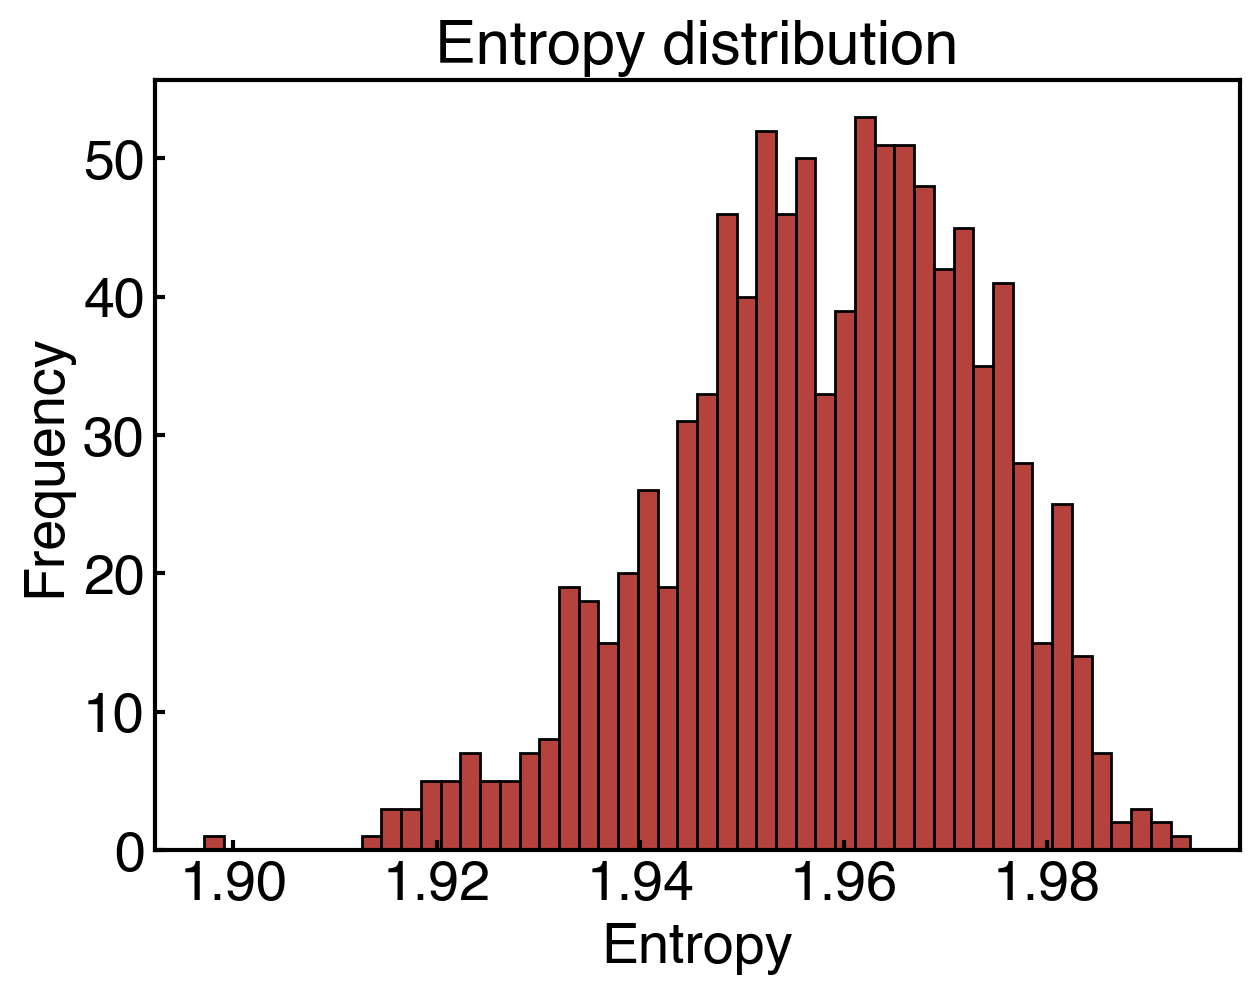

In [5]:
entropy_list = [entropy(partial_trace(random_density_matrix(2**n).data, [0,1]), base=2) for _ in range(1000)]

from utils import *
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(entropy_list, bins=50, edgecolor='black')
ax.set_xlabel('Entropy'); ax.set_ylabel('Frequency'); ax.set_title('Entropy distribution')

In [6]:
commutator(SparsePauliOp("XIIZI"), SparsePauliOp("XXIZI")).simplify()
anti_commutator(SparsePauliOp("XIIZI"), SparsePauliOp("XXIZI")).simplify()

SparsePauliOp(['IXIII'],
              coeffs=[2.+0.j])

In [7]:
op = SparsePauliOp.from_list([("XIIZI", 1), ("IYIIY", 2)])
print('op: ', op)
print('Spectral norm: ', norm(op, ord=2))
print('Trace norm: ', norm(op, ord='nuc'))
print('Frobenius norm: ', norm(op, ord='fro'))
# print(norm(SparsePauliOp.from_list([("XYZI", 1)]), ord='nuc'))

op:  SparsePauliOp(['XIIZI', 'IYIIY'],
              coeffs=[1.+0.j, 2.+0.j])
Spectral norm:  3.0000000000000004
Trace norm:  63.999999999999986
Frobenius norm:  12.649110640673518
